In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

In [19]:
df = pd.read_csv("./data/sonar.all-data", header= None)
df.shape

(208, 61)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [21]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [22]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [23]:
df[60] = df[60].map({
    'M':0,
    'R': 1
})

In [24]:
df[60][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: 60, dtype: int64

In [25]:
X = torch.tensor(df.iloc[:,:-1].values, dtype= torch.float32)
y = torch.tensor(df.iloc[:,-1].values, dtype= torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [26]:
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

In [27]:
batch_size = 16

train_loader = DataLoader(dataset= train_data, batch_size= batch_size, shuffle= True)
test_loader = DataLoader(dataset= test_data, batch_size= batch_size, shuffle= True)

In [28]:
class SimpleNNClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features= 60, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features= 64),
            nn.ReLU(),
            nn.Linear(in_features= 64, out_features= 2)

        )

    def forward(self, x):
        return self.network(x)



In [29]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs = 20):

    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))


        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []

        with torch.inference_mode():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)

                y_pred.extend(predicted.numpy())
                y_true.extend(labels.numpy())

        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy) 



        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val Accuracy: {val_accuracies[-1]:.4f}")

    return train_losses, val_losses, val_accuracies

Epoch 1/20 - Train Loss: 0.6905 - Val Loss: 0.6813 - Val Accuracy: 0.5192
Epoch 2/20 - Train Loss: 0.6757 - Val Loss: 0.6749 - Val Accuracy: 0.5192
Epoch 3/20 - Train Loss: 0.6637 - Val Loss: 0.6611 - Val Accuracy: 0.6538
Epoch 4/20 - Train Loss: 0.6451 - Val Loss: 0.6383 - Val Accuracy: 0.7115
Epoch 5/20 - Train Loss: 0.6258 - Val Loss: 0.6085 - Val Accuracy: 0.6923
Epoch 6/20 - Train Loss: 0.6003 - Val Loss: 0.5792 - Val Accuracy: 0.7115
Epoch 7/20 - Train Loss: 0.5661 - Val Loss: 0.5576 - Val Accuracy: 0.7308
Epoch 8/20 - Train Loss: 0.5246 - Val Loss: 0.5247 - Val Accuracy: 0.7500
Epoch 9/20 - Train Loss: 0.5084 - Val Loss: 0.5696 - Val Accuracy: 0.7115
Epoch 10/20 - Train Loss: 0.4915 - Val Loss: 0.4629 - Val Accuracy: 0.7692
Epoch 11/20 - Train Loss: 0.4397 - Val Loss: 0.4729 - Val Accuracy: 0.7885
Epoch 12/20 - Train Loss: 0.4199 - Val Loss: 0.4524 - Val Accuracy: 0.7308
Epoch 13/20 - Train Loss: 0.4123 - Val Loss: 0.4742 - Val Accuracy: 0.7692
Epoch 14/20 - Train Loss: 0.3798 -

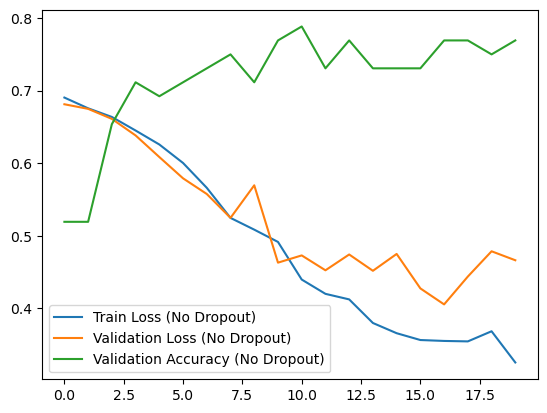

In [30]:
# Initialize and train the model without dropout
model = SimpleNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, test_loader, criterion, optimizer, epochs=20
)

# Plot training and validation loss and accuracy (Without Dropout)
plt.plot(train_loss, label="Train Loss (No Dropout)")
plt.plot(val_loss, label="Validation Loss (No Dropout)")
plt.plot(val_accuracy, label="Validation Accuracy (No Dropout)")
plt.legend()
plt.show()

In [31]:
class SimpleNNClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features= 60, out_features=128),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout layer after the first ReLU
            nn.Linear(in_features=128, out_features= 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),  # Dropout layer after the first ReLU
            nn.Linear(in_features= 64, out_features= 2)

        )

    def forward(self, x):
        return self.network(x)


Epoch 1/20 - Train Loss: 0.6945 - Val Loss: 0.6868 - Val Accuracy: 0.6154
Epoch 2/20 - Train Loss: 0.6798 - Val Loss: 0.6783 - Val Accuracy: 0.5192
Epoch 3/20 - Train Loss: 0.6826 - Val Loss: 0.6773 - Val Accuracy: 0.5192
Epoch 4/20 - Train Loss: 0.6726 - Val Loss: 0.6653 - Val Accuracy: 0.5192
Epoch 5/20 - Train Loss: 0.6624 - Val Loss: 0.6669 - Val Accuracy: 0.5192
Epoch 6/20 - Train Loss: 0.6621 - Val Loss: 0.6378 - Val Accuracy: 0.5577
Epoch 7/20 - Train Loss: 0.6443 - Val Loss: 0.6299 - Val Accuracy: 0.5962
Epoch 8/20 - Train Loss: 0.6448 - Val Loss: 0.6653 - Val Accuracy: 0.5385
Epoch 9/20 - Train Loss: 0.6322 - Val Loss: 0.5930 - Val Accuracy: 0.7308
Epoch 10/20 - Train Loss: 0.6336 - Val Loss: 0.5932 - Val Accuracy: 0.7115
Epoch 11/20 - Train Loss: 0.6119 - Val Loss: 0.5981 - Val Accuracy: 0.6538
Epoch 12/20 - Train Loss: 0.5981 - Val Loss: 0.5646 - Val Accuracy: 0.7692
Epoch 13/20 - Train Loss: 0.6089 - Val Loss: 0.5787 - Val Accuracy: 0.7692
Epoch 14/20 - Train Loss: 0.5735 -

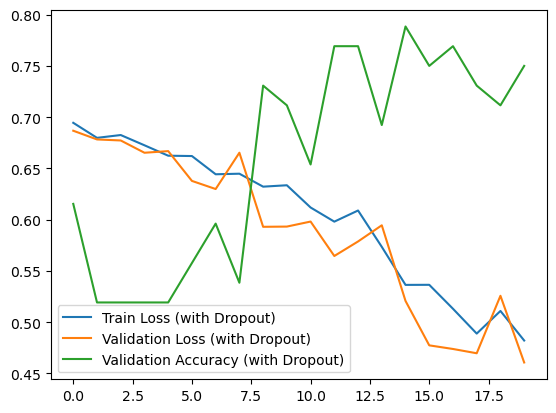

In [32]:
# Initialize and train the model without dropout
model = SimpleNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_loss, val_loss, val_accuracy = train_model(
    model, train_loader, test_loader, criterion, optimizer, epochs=20
)

# Plot training and validation loss and accuracy (Without Dropout)
plt.plot(train_loss, label="Train Loss (with Dropout)")
plt.plot(val_loss, label="Validation Loss (with Dropout)")
plt.plot(val_accuracy, label="Validation Accuracy (with Dropout)")
plt.legend()
plt.show()